## 1. Import and Install Dependencies

### 1.1 Install Dependencies

In [37]:
!pip install tensorflow tensorflow-gpu tensorflow-io matplotlib
# tensorflow-gpu will be needed since a cuda enabled gpu is being used
# tensorflow-io will be used for audio processing
# matplot lib will be used to visualize the results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.2 Load Dependencies

In [38]:
import os
# This dependency will make it easier to navigate through the directories.
from matplotlib import pyplot as plt
# This dependency will make it easier to visualize the results and the waveforms
# once the audio files have been converted.
import tensorflow as tf
# This dependency will be used to build the deep learning model.
import tensorflow_io as tfio
# This dependency makes it easier to process the audio clips and convert them
# into a usable format.

## 2. Build Data Loading Function

### 2.1 Define Paths to Files

In [ ]:
# Here a path will be defined to a single clip and confirming the path works.
# We will create paths to both the male vocal files and the drum kit files.

In [39]:
from google.colab import drive
drive.mount('/content/drive')
# Since Google Colab is being used, the corresponding Google Drive will need to 
# be mounted to the project in order to access the data saved on it.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Below code below is defining the paths to the files and testing them.

In [40]:
DRUM_PATH = '/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit/'

In [41]:
DRUM_KIT_FILE = os.path.join(DRUM_PATH, '0c67f402 1.wav')

In [42]:
DRUM_KIT_FILE

'/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit/0c67f402 1.wav'

In [43]:
MALE_PATH = '/content/drive/My Drive/Colab Notebooks/Data 2/Male Vocal/'

In [44]:
MALE_VOCAL_FILE = os.path.join(MALE_PATH, 'm4_arpeggios_c_slow_forte_a.wav')

In [45]:
MALE_VOCAL_FILE

'/content/drive/My Drive/Colab Notebooks/Data 2/Male Vocal/m4_arpeggios_c_slow_forte_a.wav'

In [ ]:
# The paths to both types of files are set up correctly.

### 2.2 Build Dataloading Function

In [46]:
def load_wav_16k_mono(filename):
# This code will load in our audio data and convert it to 16 Hz (16k) in a
# single channel (mono).
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # The above two lines of code will be used to convert the audio file into a 
    # waveform.
    wav = tf.squeeze(wav, axis=-1)
    # This coding removes the trailing axis
    sample_rate = tf.cast(sample_rate, dtype=tf.int64) 
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    # The above two lines of code will convert the audio file from 44100Hz to 
    # 1600hz, which is the amplitude of the audio signal.
    return wav 
# This code is adapted from the dataloading function found in the tensorflow 
# documentation.

In [47]:
file_contents = tf.io.read_file(DRUM_KIT_FILE)

In [48]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [49]:
wav

<tf.Tensor: shape=(160000, 1), dtype=float32, numpy=
array([[ 3.0517578e-05],
       [-3.0517578e-05],
       [ 0.0000000e+00],
       ...,
       [-3.0517578e-05],
       [-3.0517578e-05],
       [-3.0517578e-05]], dtype=float32)>

In [50]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [51]:
len(wav)

160000

In [ ]:
!pip install tensorflow_io==0.23.1
# The above had to be install for the Dataloading Function to work in Google
# Colab.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.1 MB 783 kB/s 
     |████████████████████████████████| 2.1 MB 83.2 MB/s 
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.26.0
    Uninstalling tensorflow-io-gcs-filesystem-0.26.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.26.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.26.0
    Uninstalling tensorflow-io-0.26.0:
      Successfully uninstalled tensorflow-io-0.26.0


In [52]:
wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)

In [53]:
wav

<tf.Tensor: shape=(58049, 1), dtype=float32, numpy=
array([[-2.4680361e-10],
       [ 3.5358275e-10],
       [-1.6573755e-09],
       ...,
       [-1.5153860e-05],
       [-1.5404235e-05],
       [ 4.2886887e-07]], dtype=float32)>

In [ ]:
# The data was loaded correctly.

### 2.3 Plot Wave

In [54]:
# First, the Male Vocal files and Drum Kit files will need to be loaded into the
# project using the Dataloading Function created above. 
dkwave = load_wav_16k_mono(DRUM_KIT_FILE)
mvwave = load_wav_16k_mono(MALE_VOCAL_FILE)

### Drum Kit Signal Plot

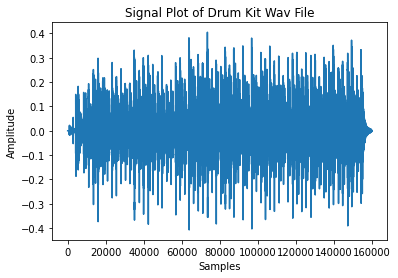

In [55]:
plt.plot(dkwave)
plt.title("Signal Plot of Drum Kit Wav File")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# The above plot is the Drum Kit wav file visualized.

### Male Audio Signal Plot

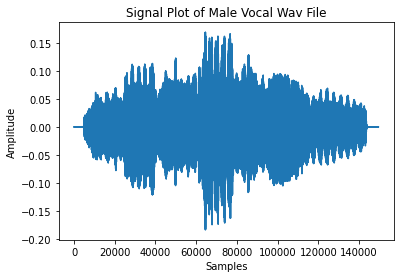

In [56]:
plt.plot(mvwave)
plt.title("Signal Plot of Male Vocal Wav File")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# The above plot is the Male Vocal wav file visualized.

## 3. Create Tensorflow Dataset

In [ ]:
# This is where the data will be loaded, to build the deep learning model.
# A data pipeline will be created, so that significant amounts of data will be 
# able to be loaded in.

### 3.1 Define Paths to Positive and Negative Data

In [57]:
DRUM_PATH_II = '/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit'
# This will be the "positive" data, as this is the data the microphone will need 
# to catch and then block from the overall signal.

In [58]:
MALE_PATH_II = '/content/drive/My Drive/Colab Notebooks/Data 2/Male Vocal'
# This will be the "negative" data, as this is the data the microphone will need 
# allow to be sent through the microphone and on down the signal path.

In [59]:
DRUMKIT = os.path.join(DRUM_PATH_II)
MALEVOCAL = os.path.join(MALE_PATH_II)

In [60]:
DRUMKIT

'/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit'

In [61]:
MALEVOCAL

'/content/drive/My Drive/Colab Notebooks/Data 2/Male Vocal'

In [ ]:
# Both file paths are working correctly.

### 3.2 Create Tensorflow Datasets

In [ ]:
# Next, the data needs to be loaded into the Tensorflow datasets.
# The 'list_files' method will be used to accomplish this.

In [62]:
drumkit = tf.data.Dataset.list_files(DRUMKIT+'/*.wav')
malevocal = tf.data.Dataset.list_files(MALEVOCAL+'/*.wav')
# This coding gives a set of files as a string inside of a Tensorflow dataset
# format.  This will allow for the data to be pre-processed before it is loaded
# in.

In [63]:
drumkit.as_numpy_iterator().next()

b'/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit/Bass Sample 21 1.wav'

In [ ]:
# This shows what the Tensorflow dataset currently has set up as the audio file
# path.

In [64]:
len(drumkit)

250

In [65]:
tf.ones(len(drumkit))

<tf.Tensor: shape=(250,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [ ]:
# 250 samples of drum kit audio, set as the binary 1.

In [66]:
len(malevocal)

250

In [67]:
tf.zeros(len(malevocal))

<tf.Tensor: shape=(250,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
# 250 samples of male vocal audio, set as binary 0.

### 3.3 Add labels and Combine Positive and Negative Samples

In [68]:
drumkits = tf.data.Dataset.zip((drumkit, tf.data.Dataset.from_tensor_slices(tf.ones(len(drumkit)))))
malevocals = tf.data.Dataset.zip((malevocal, tf.data.Dataset.from_tensor_slices(tf.zeros(len(malevocal)))))
data = drumkits.concatenate(malevocals)
# Here the data is labeled as either positive (drum kit) or negative (male vocal).
# The two sets of data will then be combined into the same variable.

In [69]:
drumkits.as_numpy_iterator().next()

(b'/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit/9adffd44 1.wav',
 1.0)

In [70]:
malevocals.as_numpy_iterator().next()

(b'/content/drive/My Drive/Colab Notebooks/Data 2/Male Vocal/m4_arpeggios_lip_trill_o.wav',
 0.0)

In [71]:
data.as_numpy_iterator().next()

(b'/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit/Snare Sample 20 1.wav',
 1.0)

In [72]:
data.shuffle(10000).as_numpy_iterator().next()

(b'/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit/Bass Sample 40 1.wav',
 1.0)

In [ ]:
# Both the positive and negative data stored into one data pipeline.

## 4. Determine Average Length of a Drum Kit Sample

In [ ]:
# By determining the average length of both the drum kit and male vocal signal,
# more accurate spectrograms will be able to be created, which will then produce
# more accurate predictions. 

### 4.1 Calculate Wave Cycle Length

In [73]:
lengths = []
for file in os.listdir(os.path.join('/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit')):
    tensor_wave = load_wav_16k_mono(os.path.join('/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit', file))
    lengths.append(len(tensor_wave))
# The above code will output the length of each individual wav file.

In [74]:
os.listdir(os.path.join('/content/drive/My Drive/Colab Notebooks/Data 2/Drum Kit'))

['0c67f402 1.wav',
 '1bc8eae1 1.wav',
 '078f7ac0 1.wav',
 '0ddb4bdf 1.wav',
 '0ed06544 1.wav',
 '06c48eab 1.wav',
 '01c2f88b 1.wav',
 '1c9a423f 1.wav',
 '09a1cfd7 1.wav',
 '03fc1f96 1.wav',
 'aed9d22f 1.wav',
 'a1b369d7 1.wav',
 'ae7d1c37 1.wav',
 'aa9ae956 1.wav',
 'a7964699 1.wav',
 '9d308738 1.wav',
 'a090c45a 1.wav',
 '9f84ea5a 1.wav',
 '9adffd44 1.wav',
 '9a4bfb69 1.wav',
 '99c96a07 1.wav',
 '9320c55f 1.wav',
 '921eee9d 1.wav',
 '88780eac 1.wav',
 '8cd809d3 1.wav',
 '8b6a16de 1.wav',
 '82d4fb44 1.wav',
 '7dda9dc2 1.wav',
 '809ea09e 1.wav',
 '7d11b3b4 1.wav',
 '73677128 1.wav',
 '6d21ad67 1.wav',
 '63e0ab2c 1.wav',
 '612702c3 1.wav',
 '6fca680b 1.wav',
 '6a96272b 1.wav',
 '5ec7ad26 1.wav',
 '5ce40b1b 1.wav',
 '5c33d972 1.wav',
 '565f3ee2 1.wav',
 '52e54bdd 1.wav',
 '4ba2b70e 1.wav',
 '493c247b 1.wav',
 '52300f9b 1.wav',
 '4c590f69 1.wav',
 '4c4d4797 1.wav',
 '46b52f97 1.wav',
 '468f9c4c 1.wav',
 '41897c32 1.wav',
 '3d3439f1 1.wav',
 '3aafb6ad 1.wav',
 '2503aaa1 1.wav',
 '3a9085ca 1

In [75]:
lengths

[160000,
 100160,
 50240,
 33280,
 50240,
 66880,
 33280,
 23360,
 26880,
 18880,
 50240,
 66880,
 139520,
 33280,
 66880,
 67520,
 26880,
 30080,
 80000,
 30080,
 27520,
 20160,
 20800,
 60480,
 66880,
 25280,
 57600,
 28480,
 33280,
 32000,
 50240,
 46400,
 33280,
 50240,
 71680,
 32000,
 66880,
 95680,
 17280,
 24960,
 39040,
 21440,
 50240,
 50240,
 17280,
 32000,
 23360,
 104960,
 66880,
 26880,
 66880,
 50240,
 21440,
 83200,
 26880,
 16320,
 50240,
 20160,
 32000,
 95680,
 50240,
 140800,
 26880,
 50240,
 89600,
 21440,
 25920,
 16000,
 26880,
 16000,
 27840,
 50240,
 29760,
 16320,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 50880,
 32000,
 32000,
 32000,
 32000,
 21440,
 26880,
 194880,
 66880,
 32000,
 32000,
 32000,
 3

### 4.2 Calculate Mean, Min, and Max

In [76]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=38301>

In [ ]:
# The average length of the drum kit samples is 38301 values.

In [ ]:
# Since the audio files were converted to 16000Hz, the average length in
# seconds can be determined.
# 16000hz, means there are 16000 cycles per second.
# The 38301 values can be divided by 16000 cycles to determine the length in 
# seconds.

In [77]:
38201/16000

2.3875625

In [ ]:
# The average length of the drum kit audio clips is 2.39 seconds long.

In [78]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [79]:
16000/16000

1.0

In [ ]:
# The minimum length of the drum kit audio clips is 16000 units or 1 second 
# long. 

In [80]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=194880>

In [81]:
194880/16000

12.18

In [ ]:
# The maximum length of the drum kit audio clips is 195258 units or 12.2
# seconds long. 

In [ ]:
# The larger the spectrograms, the more variables there will be for the deep
# learning model, which means the more time it will take to take to train,
# which means the higher amount of latency there will be.

In [ ]:
# The processing needs to be quick so 48,000 will be used.

## 5. Build Preprocessing Function to Convert to Spectrogram

### 5.1 Build Preprocessing Function

In [ ]:
# The short time forier transfer will be used for conversion into a spectrogram.
# The labels assigned (0.0 or 1.0) will be used to make sure the designation
# is still there after the data goes through the preprocess function.

In [82]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    # The data will be loaded into the wav form.
    wav = wav[:48000]
    # The first 88000 steps will be grabbed for an example from each one 
    # of the signals.
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    # Not everyone of the clips are going to meet that limit.  Anything that 
    # doesn't meet the full length of the clip, will be padded with 0s.
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    # This removes any negative numbers, and outputs only positive examples.
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    # This encapsulates the spectrogram in another set of arrays, to ensure the
    # proper format is available to produce a deep learning model.
    return spectrogram, label

In [83]:
wav = load_wav_16k_mono(DRUM_KIT_FILE)
wav

<tf.Tensor: shape=(160000,), dtype=float32, numpy=
array([ 1.7656580e-10, -8.8017410e-10,  2.5306810e-09, ...,
       -6.2267485e-05, -2.9347979e-05, -1.1128018e-06], dtype=float32)>

### 5.2 Test Out the Function and Viz the Spectrogram

In [84]:
dkfilepath, dklabel = drumkits.shuffle(buffer_size = 10000).as_numpy_iterator().next()

In [85]:
dkspectrogram, dklabel = preprocess(dkfilepath, dklabel)

In [86]:
dkspectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[1.5937524e-03],
        [5.9714341e-03],
        [1.3667408e-02],
        ...,
        [2.3815501e-06],
        [2.7295621e-06],
        [2.8706854e-06]],

       [[1.2140833e-03],
        [5.9971986e-03],
        [1.4561006e-02],
        ...,
        [2.2425834e-06],
        [2.5571949e-06],
        [2.4317414e-06]],

       [[5.0907035e-04],
        [7.1352199e-03],
        [1.5109981e-02],
        ...,
        [2.1010762

### Drum Kit Spectrogram

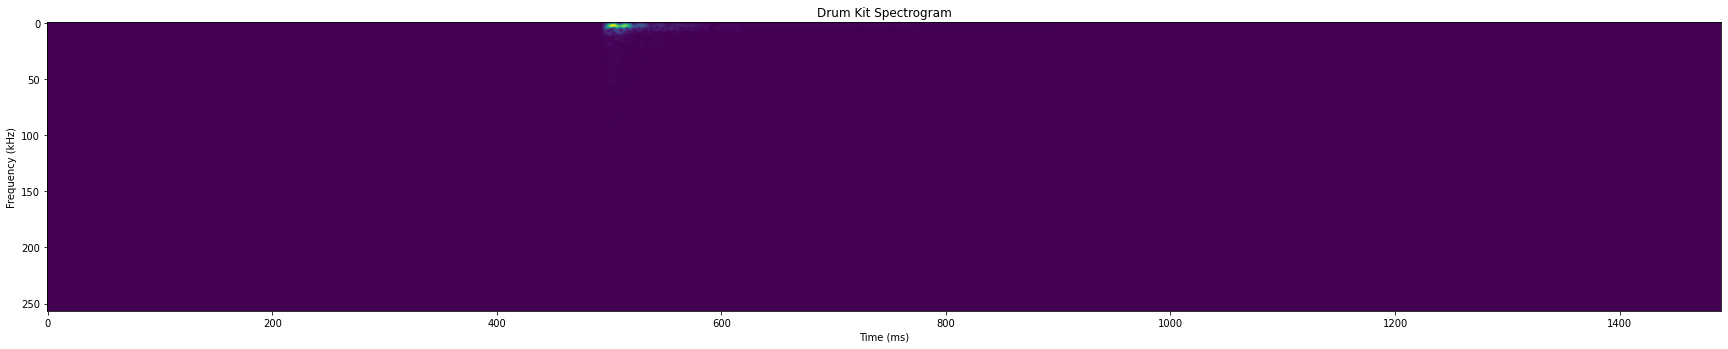

In [87]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(dkspectrogram)[0])
plt.title("Drum Kit Spectrogram")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (kHz)")
plt.show()

In [ ]:
# Visual representation of what the drum kit sample sounds like.

In [88]:
mvfilepath, mvlabel = malevocals.shuffle(buffer_size = 10000).as_numpy_iterator().next()

In [89]:
mvspectrogram, mvlabel = preprocess(mvfilepath, mvlabel)

In [90]:
mvspectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.6527560e-02],
        [1.7007520e-02],
        [1.5108290e-02],
        ...,
        [1.0928208e-06],
        [4.2708686e-07],
        [0.0000000e+00]],

       [[8.8078612e-03],
        [1.1890479e-02],
        [1.2517569e-02],
        ...,
        [1.0445750e-06],
        [4.0464820e-07],
        [4.3772161e-08]],

       [[1.4850111e-03],
        [7.3813596e-03],
        [9.5362999e-03],
        ...,
        [8.1846161e-07],
        [4.4434205e-07],
        [2.0285370e-07]],

       ...,

       [[2.4668045e-02],
        [2.7108453e-02],
        [2.3106091e-02],
        ...,
        [1.8698292e-06],
        [1.4934797e-06],
        [8.9779496e-07]],

       [[3.3560101e-02],
        [2.7814582e-02],
        [2.3606569e-02],
        ...,
        [2.1201074e-06],
        [1.5252406e-06],
        [9.1269612e-07]],

       [[2.8270669e-02],
        [3.0518025e-02],
        [2.2063399e-02],
        ...,
        [1.0372179

### Male Vocal Spectrogram

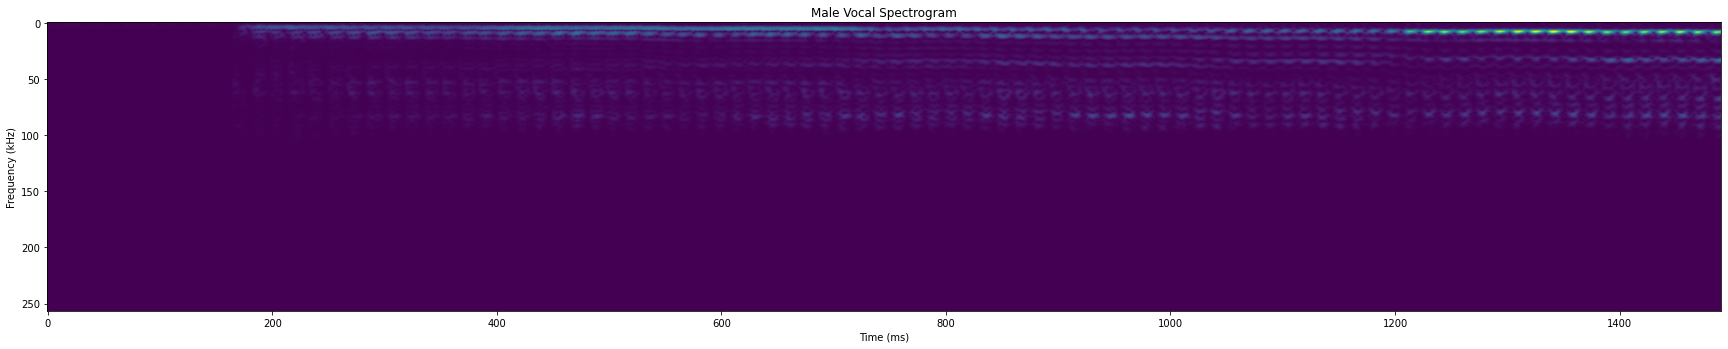

In [91]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(mvspectrogram)[0])
plt.title("Male Vocal Spectrogram")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (kHz)")
plt.show()

In [ ]:
# Visual representation of what the male vocal sample sounds like.

## 6. Create Training and Testing Partitions

### 6.1 Create a Tensorflow Data Pipeline

In [92]:
data = data.map(preprocess)
# The above code runs the data through the spectrogram function.
data = data.cache()
data = data.shuffle(buffer_size=1000)
# This code provides a mixed bag to draw from out of the drum kit audio samples
# (positive) and male audio samples (negative).  This ensures that there's no
# overfitting, and no unnecessary bias or variance is introduced into our 
# model.
data = data.batch(16)
# Training will be on 16 samples at a time.
data = data.prefetch(8)
# 8 examples will be prefetched to elimate any CPU bottlenecking.

### 6.2 Split into Training and Testing Partitions

In [93]:
len(data)*.7

22.4

In [94]:
len(data)*.3

9.6

In [ ]:
# 70% of our data produces a value of 23.
# 30 percent of our data produces a value of 10.
# The above values will be used in teh training and testing partitions.

In [95]:
train = data.take(23)
test = data.skip(23).take(10)

In [ ]:
# The above code outputs the training and testing partition.

### 6.3 Test One Batch

In [96]:
samples, labels = train.as_numpy_iterator().next()

In [97]:
samples.shape

(16, 1491, 257, 1)

In [ ]:
# There are 16 different examples of the spectrogram, which have the
# shape of 1491 by 257 by 1.  This specific shape will be needed to run
# the input through the deep learning model.

In [ ]:
# The training and testing partition have effectively been created.

## 7. Build Deep Learning Model

### 7.1 Load Tensorflow Dependencies

In [ ]:
# A few more dependencies will be needed to build the Deep Learning Model.

In [98]:
from tensorflow.keras.models import Sequential
# This package will provide the Sequential API.
from tensorflow.keras.layers import Conv2D, Dense, Flatten
# This package will import 3 needed layers.

### 7.2 Build Sequential Model, Compile and View Summary

In [99]:
model = Sequential()
# First, the Sequential model will be defined.
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
# Next a convolution layer will be added.
# This defines the desired output of 16 different kernels of shape 3 x 3.
# Activation=relu stands for a "rectivied linear unit".
# The input shape is to match what the spectrogram looks like.
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
# This above code takes the covolutional outputs in 3 dimentions and flatten
# them down to a single dimension.
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# The above code provides either an output of:
# 1 - Drum Kit Sample, "Positive" or
# 0 - Male Vocal Sample, "Negative"

In [100]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
# The "Adam Optimizer" is a, "replacement optimization algorithm for stochastic 
# gradient descent for training deep learning models."
# The Binary Crossentropy, "compares each of the predicted probabilities to 
# actual class output which can be either 0 or 1.  This will be used since
# utlizied binary classification is needed for the results.
# The data will also pass through a couple of metrics, "Recall" & "Precision".

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# The above is the neural network.
# It's rather large with 770,482, 865 parameters in it.

### 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
# Now the model can be trained!

In [102]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
# This installation will be needed to run the "model.fit" on Google Colab.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 60 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (64.4 MB/s)
(Reading database ... 155639 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155617 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [103]:
hist = model.fit(train, epochs=4, validation_data=test)
# "hist" will provide the training values, the loss metrics for the validation
# partition and training partition.  
# Essentially, by capturing this memory, it can then be visualized.
# 4 epochs will be trained.
# The amount of epochs is based on how accurate the model needs to be and 
# based on whether or not overfitting is beginning to happen.

Epoch 1/4
23/23 [==============================] - 9s 219ms/step - loss: 1.6944 - recall: 0.8934 - precision: 0.9215 - val_loss: 0.0016 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 2/4
23/23 [==============================] - 5s 204ms/step - loss: 0.0053 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0375 - val_recall: 0.9683 - val_precision: 1.0000
Epoch 3/4
23/23 [==============================] - 5s 205ms/step - loss: 0.0667 - recall: 0.9836 - precision: 0.9945 - val_loss: 0.0150 - val_recall: 0.9841 - val_precision: 1.0000
Epoch 4/4
23/23 [==============================] - 5s 205ms/step - loss: 0.0376 - recall: 0.9946 - precision: 0.9893 - val_loss: 0.1592 - val_recall: 0.9855 - val_precision: 1.0000


In [104]:
hist.history['loss']

[1.6944029331207275,
 0.005305704660713673,
 0.06668692082166672,
 0.037572380155324936]

In [ ]:
# The audio classification model has successfully been trained!
# The training partition ended with 99% recall and 99% precicion.
# the validation partition ended with 99% recall and 100% precision.

### Loss Plot

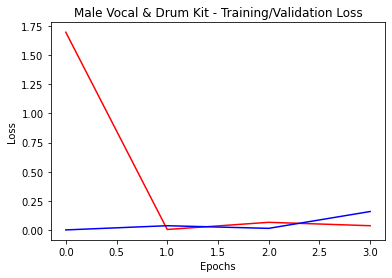

In [105]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.title("Male Vocal & Drum Kit - Training/Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Precision Plot

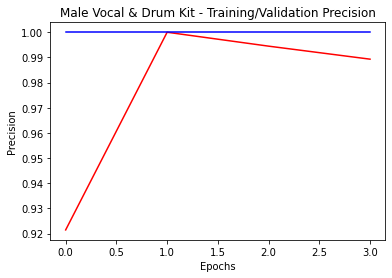

In [106]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.title("Male Vocal & Drum Kit - Training/Validation Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.show()

### Recall Plot

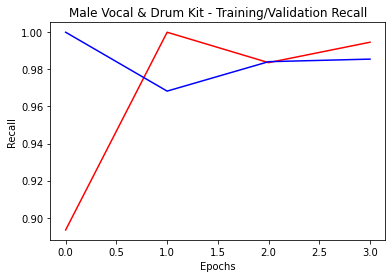

In [107]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.title("Male Vocal & Drum Kit - Training/Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.show()

## 8. Make a Prediction on a Single Clip

### 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
X_test.shape
# This should output 16 spectrograms.

(16, 1491, 257, 1)

In [ ]:
y_test.shape
# This should output 16 labels.

(16,)

In [ ]:
yhat = model.predict(X_test)
# This will allow for the audio clips to through the deep learning model
# and for predictions to be made.

In [ ]:
yhat

array([[9.7304963e-11],
       [1.5317193e-09],
       [0.0000000e+00],
       [2.4367682e-07],
       [3.9502145e-11],
       [1.0000000e+00],
       [5.6110011e-08],
       [0.0000000e+00],
       [2.8862319e-30],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0881581e-30],
       [3.4404360e-10],
       [4.0034109e-07],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [ ]:
# The above are the logits, or the "confidence matrix".
# Anything 1.000000 is a match to the drum kit.
# Rather than looking at these mannually, they can be converted into classes.

### 8.2 Convert Logits to Classes

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
yhat

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [ ]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [ ]:
# This shows that 5 drum kit signals were detected in that clip.

In [ ]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [ ]:
# 5 drum kit signals were detected in the actual.
# This shows that the model is accurately predicting.

In [ ]:
yhat

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [ ]:
y_test.astype(int)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
# The model is accurately predicitng what is a drum kit signal and what is not.

## 9. Build Forest Parsing Functions

In [ ]:
# Time to go through the recorded audio clips from Harvest Chapel.

### 9.1 Load up MP3s

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # The audio clips from Harvest Chapel are in an mp3 format.
    # This function will take the mp3 and convert it into a tensor.  
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Each one of the files are multi-channel.  The average between the two
    # different channels will be reduced down into a single-channel value.
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # The above code will extract sample rate and cast.
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    # The above code will resample the resulting wave file to 16 Hz.
    return wav

In [ ]:
AUDIO_PATH = '/content/drive/My Drive/Colab Notebooks/Data 2/Audio Files/'

In [ ]:
mp3 = os.path.join(AUDIO_PATH, 'Chayce Audio (1) 1.mp3')
# The above code defines our file path.

In [ ]:
wav = load_mp3_16k_mono(mp3)
# The above code will load the mp3 file into a wav file.

In [ ]:
wav

<tf.Tensor: shape=(2925714,), dtype=float32, numpy=
array([ 0.0000000e+00, -2.8851102e-16, -2.1863022e-15, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)>

In [ ]:
# Now the audio file will be converted into a number of slices.
# Rather than taking one massive clip and trying to make a prediction,
# the clip will sliced into the same size audio slices that were
# passed to the model.
# This will allow for multiple predictions on a single audio clip.

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

In [ ]:
len(audio_slices)

60

In [ ]:
samples.shape

(1, 48000)

In [ ]:
# The clip has successfully been converted into 60 different windows.

### 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
# The above code is a function for converting the converted mp3 audio clips 
# into spectrograms.

### 9.3 Convert Longer Clips into Windows and Make Predictions

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]
# 99% was used to increase the conficence of the model, meaning only the most
# confident predictions will be considered valid for drum kit signal detection.

In [ ]:
yhat

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
len(yhat)

182

In [ ]:
# The model is classifying consecutive drum kit signals as additional
# predictions.  
# The results will need to be reduced down, so that consecutive drum 
# kit signals are only treated as a single signal.

### 9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
# The above code will loop through the predictions from yhat, and
# reduce the sum.

In [ ]:
yhat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [ ]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [ ]:
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

5

In [ ]:
# The drum kit signal count has successfully been aggregated.

## 10. Make Predictions

In [ ]:
# Now each of the church recordings can be looped through.

### 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join(AUDIO_PATH)):
    FILEPATH = os.path.join(AUDIO_PATH, file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)

    results[file] = yhat

# The above code will loop through each audio recording the "Church Audio"
# directory.  Essentially, doing the same thing that was done above, but for 
# all of the church audio samples.

In [ ]:
results

{'Chayce Audio (1) 1.mp3': array([[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [1.1495955e-26],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [7.6995228e-27],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [7.1879327e-03],
        [7.2388552e-02],
        [1.1980917e-02],
        [8.6901073e-06],
        [2.8158678e-05],
        [7.8791606e-01],
        [1.0000000e+00],
        [9.9981636e-01],
        [7.3802017e-02],
        [8.0473692e-05],
        [1.1396329e-05],
        [2.8494358e-07],
        [9.8588145e-01],
        [2.2646645e-01],
        [2.3166266e-20],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],

### 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'Chayce Audio (1) 1.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 'Chayce Audio (2) 1.mp3': [1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Chayce Audio (3) 1.mp3': [0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 'Chayce Audio (4) 

In [ ]:
# For each recording, there is a prediction for every set of slices within
# othat audio file.
# Intrepetting it like this can be a bit difficult, so below code will be
# used to convert all predictions into classes.

### 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'Chayce Audio (1) 1.mp3': 2,
 'Chayce Audio (2) 1.mp3': 7,
 'Chayce Audio (3) 1.mp3': 4,
 'Chayce Audio (4) 1.mp3': 5,
 'Chayce Audio (5) 1.mp3': 1,
 'Drum Kit (1) 1.mp3': 1,
 'Drum Kit (2) 1.mp3': 1,
 'Drum Kit (3) 1.mp3': 4,
 'Drum Kit (4) 1.mp3': 4,
 'Drum Kit (5) 1.mp3': 2,
 'Shayne Audio (1) 1.mp3': 2,
 'Shayne Audio (2) 1.mp3': 0,
 'Shayne Audio (3) 1.mp3': 7,
 'Shayne Audio (4) 1.mp3': 7,
 'Shayne Audio (5) 1.mp3': 5}

## 11. Export Results

In [ ]:
import csv

In [ ]:
with open('Density of Drum Kit Signals.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['Recording', 'Drum_Kit_Signal'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])

In [ ]:
# The model and final results can be used to engineer the A.I. for the 
# microphones. They will be used to increase the A.I.'s efficiency and ability 
# to detect and remove any unwanted signal before the signal is sent out of
# the microphone and onto the audio interface.